---

## `Note:`

This file is related to the exercises of one of the lessons of the __Data science professional certificate by IBM__ in which I have made changes to improve the accuracy of the classification model.

---

**K-Nearest Neighbors** is a supervised learning algorithm. Where the data is 'trained' with data points corresponding to their classification. To predict the class of a given data point, it takes into account the classes of the 'K' nearest data points and chooses the class in which the majority of the 'K' nearest data points belong to as the predicted class.


### Here's an visualization of the K-Nearest Neighbors algorithm.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/images/KNN_Diagram.png">


In this case, we have data points of Class A and B. We want to predict what the star (test data point) is. If we consider a k value of 3 (3 nearest data points), we will obtain a prediction of Class B. Yet if we consider a k value of 6, we will obtain a prediction of Class A.


In this sense, it is important to consider the value of k. Hopefully from this diagram, you should get a sense of what the K-Nearest Neighbors algorithm is. It considers the 'K' Nearest Neighbors (data points) when it predicts the classification of the test point.


Let's load required libraries


In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

<div id="about_dataset">
    <h2>About the dataset</h2>
</div>


Imagine a telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset,  with predefined labels, we need to build a model to be used to predict class of a new or unknown case.

The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns.

The target field, called **custcat**, has four possible values that correspond to the four customer groups, as follows:
1- Basic Service
2- E-Service
3- Plus Service
4- Total Service

Our objective is to build a classifier, to predict the class of unknown cases. We will use a specific type of classification called K nearest neighbour.


**Did you know?** When it comes to Machine Learning, you will likely be working with large datasets. As a business, where can you host your data? IBM is offering a unique opportunity for businesses, with 10 Tb of IBM Cloud Object Storage: [Sign up now for free](http://cocl.us/ML0101EN-IBM-Offer-CC)


### Load Data 


Let's read the data using pandas library and print the first five rows.


In [3]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [4]:
# # save dataframe to local system
# df.to_csv("df.csv")

<div id="visualization_analysis">
    <h2>Data Visualization and Analysis</h2> 
</div>


#### Let’s see how many of each class is in our data set


In [5]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

#### 281 Plus Service, 266 Basic-service, 236 Total Service, and 217 E-Service customers


You can easily explore your data using visualization techniques:


array([[<Axes: title={'center': 'income'}>]], dtype=object)

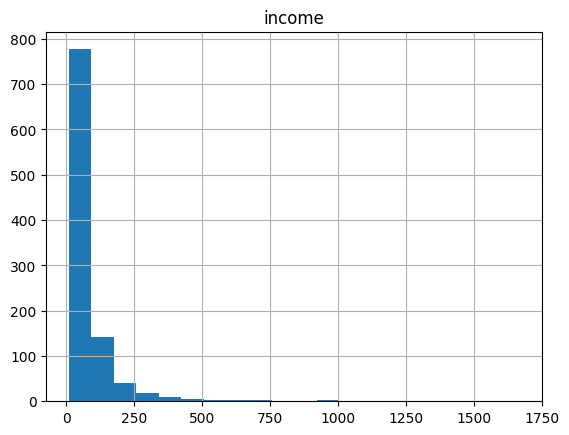

In [6]:
df.hist(column='income', bins=20)

### Feature set


Let's define feature sets, X:


In [7]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [8]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']]
X.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside
0,2,13,44,1,9,64.0,4,5,0.0,0,2
1,3,11,33,1,7,136.0,5,5,0.0,0,6
2,3,68,52,1,24,116.0,1,29,0.0,1,2
3,2,33,33,0,12,33.0,2,0,0.0,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4


What are our labels?


In [9]:
y = df[['custcat']]
y.head()

,custcat
0,1
1,4
2,3
3,1
4,3


## Normalize Data


Data Standardization gives the data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on the distance of data points:


In [10]:
X = preprocessing.StandardScaler().fit_transform(X)
X

array([[-0.02696767, -1.055125  ,  0.18450456, ..., -0.22207644,
        -1.03459817, -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243, ..., -0.22207644,
        -1.03459817,  2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601, ..., -0.22207644,
         0.96655883, -0.23065004],
       ...,
       [ 1.19883553,  1.47425216,  1.37948227, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  1.61477311,  0.58283046, ..., -0.22207644,
         0.96655883, -0.92747794],
       [ 1.19883553,  0.67796676, -0.45281689, ..., -0.22207644,
         0.96655883,  0.46617787]])

### Train Test Split

Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of our model overfitting.

It is important that our models have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data. So how can we improve out-of-sample accuracy? One way is to use an evaluation approach called Train/Test Split.
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.

This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that has been used to train the model. It is more realistic for the real world problems.


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800, 1)
Test set: (200, 11) (200, 1)


<div id="classification">
    <h2>Classification</h2>
</div>


## K nearest neighbor (KNN)

#### Import library


Classifier implementing the k-nearest neighbors vote.


In [12]:
from sklearn.neighbors import KNeighborsClassifier

### Training

Let's start the algorithm with k=4 for now:


In [13]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

c:\Users\alikh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=4)

`The y should be in 1d shape. So I use y.squeeze()`

In [14]:
y_train = y_train.squeeze()
y_train

608    4
511    4
641    3
112    1
535    3
      ..
897    2
709    4
439    4
174    2
122    1
Name: custcat, Length: 800, dtype: int64

In [15]:
# train again
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

### Predicting

We can use the model to make predictions on the test set:


In [16]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 1, 3, 2, 4], dtype=int64)

## DecisionTree classifier

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [28]:
# define a list for possible max depth values of the decision tree
max_depth = [i for i in range(3,10)]
max_depth

# define an empty list for scores
scores = []

In [29]:
# create an instance from class
for i in max_depth:
    # classifier
    dtc = DecisionTreeClassifier(criterion="entropy", splitter="best", max_depth=i)
    score = cross_val_score(estimator=dtc, X=X_train, y=y_train, cv=5, n_jobs=2)
    scores.append(score.mean())

scores

[0.36125000000000007,
 0.35625,
 0.3625,
 0.34125,
 0.3025,
 0.32249999999999995,
 0.30875]

In [32]:
print(f"Best score: {max(scores)}")

Best score: 0.3625


Text(0, 0.5, 'Accuracy Score')

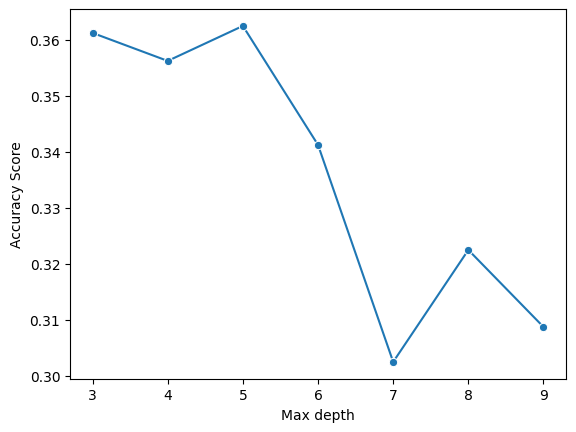

In [35]:
sns.lineplot(x = max_depth, y = scores, marker = 'o')
plt.xlabel("Max depth")
plt.ylabel("Accuracy Score")

In [36]:
best_dtc = DecisionTreeClassifier(max_depth=5)

In [37]:
best_dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [38]:
dtc_pred = best_dtc.predict(X_test)

### Accuracy evaluation

In multilabel classification, **accuracy classification score** is a function that computes subset accuracy. This function is equal to the jaccard_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.


In [39]:
from sklearn import metrics

In [40]:
# KNN
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5475
Test set Accuracy:  0.32


In [41]:
# DecisionTree classifier
print("Train set Accuracy: ", metrics.accuracy_score(y_train, best_dtc.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, dtc_pred))

Train set Accuracy:  0.49875
Test set Accuracy:  0.415


## Practice

Can you build the model again, but this time with k=6?


In [21]:
# write your code here
knn = KNeighborsClassifier(n_neighbors= 6)
knn

KNeighborsClassifier(n_neighbors=6)

In [30]:
knn.fit(X=X_train,
        y=y_train)

KNeighborsClassifier(n_neighbors=6)

In [31]:
y_hat = knn.predict(X_test)

In [34]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_hat))

Train set Accuracy:  0.51625
Test set Accuracy:  0.31


#### What about other K?

K in KNN, is the number of nearest neighbors to examine. It is supposed to be specified by the user. So, how can we choose right value for K?
The general solution is to reserve a part of your data for testing the accuracy of the model. Then choose k =1, use the training part for modeling, and calculate the accuracy of prediction using all samples in your test set. Repeat this process, increasing the k, and see which k is the best for your model.

We can calculate the accuracy of KNN for different values of k.


#### Plot the model accuracy for a different number of neighbors.


In [37]:
from sklearn.model_selection import GridSearchCV

In [39]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 6,
 'p': 2,
 'weights': 'uniform'}

In [137]:
params = {"n_neighbors":list(range(20,200,2))}

In [138]:
gs = GridSearchCV(estimator=knn,
             param_grid=params,
             n_jobs=2,
             return_train_score=True,
             refit=True)

In [139]:
gs.fit(X=X_train,y=y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=198), n_jobs=2,
             param_grid={'n_neighbors': [20, 22, 24, 26, 28, 30, 32, 34, 36, 38,
                                         40, 42, 44, 46, 48, 50, 52, 54, 56, 58,
                                         60, 62, 64, 66, 68, 70, 72, 74, 76, 78, ...]},
             return_train_score=True)

In [140]:
gs.best_score_

0.40125

In [141]:
knn_best = gs.best_estimator_

In [142]:
gs.best_params_

{'n_neighbors': 174}

In [143]:
y_hat_best = knn_best.predict(X_test)

In [144]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn_best.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_hat_best))

Train set Accuracy:  0.41875
Test set Accuracy:  0.36


In [104]:
y_hat_best.shape

(200,)

In [ ]:
y_hat_best

`Cross validation`

In [106]:
from sklearn.model_selection import cross_val_score

In [122]:
# define k range
k_values = [i for i in range(20,200,2)]

#define a list to store the scores
scores = []

In [123]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X=X_train, y=y_train, cv=5)
    scores.append(np.mean(score))

In [129]:
max(scores)

0.40125

In [131]:
import seaborn as sns
import plotly.express as px
import plotly.io as pio

pio.templates.default="simple_white"

In [132]:
px.line(x=k_values, y=scores)

Text(0, 0.5, 'Accuracy Score')

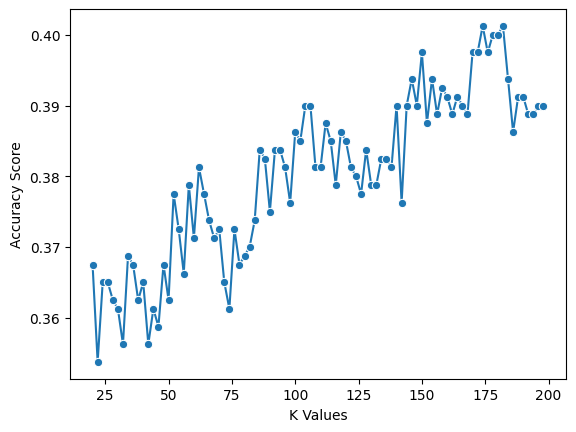

In [124]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")